## Name: Deepanshu Mittal
## Roll No: MDS202320

## Using the code from assignment 1

IMPORT RELEVANT LIBRARIES

In [16]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASETS
- Train.csv
- Validation.csv
- Test.csv

In [17]:
train_data=pd.read_csv("train.csv")
validate_data=pd.read_csv("validation.csv")
test_data=pd.read_csv("test.csv")

PREPARE ATTRIBUTES AND LABELS FOR TRAINING

In [18]:
X_train, y_train = train_data["clean_message"], train_data["label"]
X_validate, y_validate = validate_data["clean_message"], validate_data["label"]
X_test, y_test = test_data["clean_message"], test_data["label"]

In [20]:
X_train.shape,X_validate.shape,X_test.shape

((3616,), (775,), (776,))

MODEL FITTING

Model used:

- Support Vector Machine
- Logistic Regression
- Random Forest

MODEL TRAINING AND EVALUATION WITHOUT HYPER PARAMETER TUNING

Training and evaluating SVM...


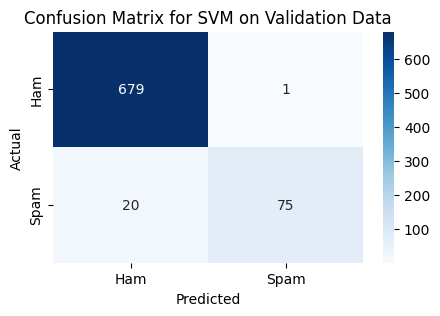

Training and evaluating Logistic Regression...


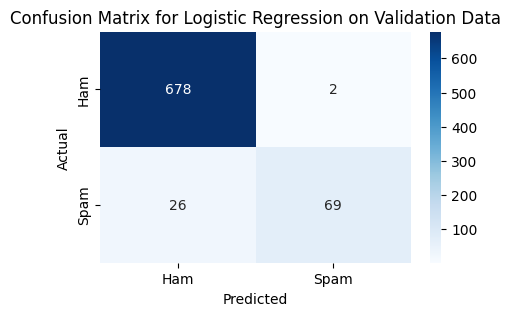

Training and evaluating Random Forest...


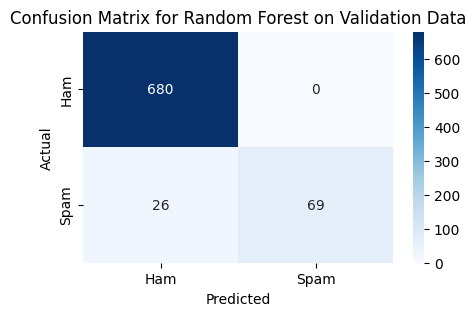

Training Data Results:
                    Accuracy Precision   Recall F1 Score CV Score
SVM                   99.72%   100.00%   97.76%   98.87%   99.17%
Logistic Regression   96.46%    99.69%   71.59%   83.33%   99.29%
Random Forest        100.00%   100.00%  100.00%  100.00%  100.00%


Validation Data Results:
                    Accuracy Precision  Recall F1 Score CV Score
SVM                   97.29%    98.68%  78.95%   87.72%   99.17%
Logistic Regression   96.39%    97.18%  72.63%   83.13%   99.29%
Random Forest         96.65%   100.00%  72.63%   84.15%   99.65%


In [11]:
# Define a function to create pipelines for each model
def create_pipeline(model):
    return Pipeline([ 
        ('tfidf', TfidfVectorizer()),  # TF-IDF Vectorization
        ('classifier', model)          # Classifier (can be SVM, Logistic Regression, Random Forest)
    ])

# Choose your models
models = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Initialize DataFrames to store results for both train and validation
df_train = pd.DataFrame(np.zeros((3, 5))) 
df_train.index = ["SVM", "Logistic Regression", "Random Forest"]
df_train.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

df_validate = pd.DataFrame(np.zeros((3, 5))) 
df_validate.index = ["SVM", "Logistic Regression", "Random Forest"]
df_validate.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

# Training and evaluation on both training and validation data
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Create pipeline with TF-IDF and the classifier
    pipeline = create_pipeline(model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # --- Training Data Metrics ---
    y_pred_train = pipeline.predict(X_train)

    # Compute metrics for training data
    model_list = list(models.keys()) 
    model_index = model_list.index(model_name)  
    df_train.iloc[model_index, 0] = accuracy_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 1] = precision_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 2] = recall_score(y_train, y_pred_train) * 100
    df_train.iloc[model_index, 3] = f1_score(y_train, y_pred_train) * 100

    # Perform cross-validation score for training data
    cv_score_train = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision')
    df_train.iloc[model_index, 4] = cv_score_train.mean() * 100

    # --- Validation Data Metrics ---
    y_pred_validate = pipeline.predict(X_validate)

    # Compute metrics for validation data
    df_validate.iloc[model_index, 0] = accuracy_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 1] = precision_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 2] = recall_score(y_validate, y_pred_validate) * 100
    df_validate.iloc[model_index, 3] = f1_score(y_validate, y_pred_validate) * 100

    # Perform cross-validation score for validation data
    cv_score_validate = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='precision')
    df_validate.iloc[model_index, 4] = cv_score_validate.mean() * 100

    # Confusion matrix plot for validation data
    cm = confusion_matrix(y_validate, y_pred_validate)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
    plt.title(f"Confusion Matrix for {model_name} on Validation Data")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display the results for training data as percentages for each metric
df_train_display = df_train.map(lambda x: f"{x:.2f}%")
print("Training Data Results:")
print(df_train_display)

# Display the results for validation data as percentages for each metric
df_validate_display = df_validate.map(lambda x: f"{x:.2f}%")
print("\n")
print("Validation Data Results:")
print(df_validate_display)


MODEL TRAINING AND EVALUATION WITH HYPER PARAMETER TUNING


In [ ]:
import pickle
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to create pipelines for each model
def create_pipeline(model):
    return Pipeline([ 
        ('tfidf', TfidfVectorizer()),  # TF-IDF Vectorization
        ('classifier', model)          # Classifier (SVM, Logistic Regression, Random Forest)
    ])

# Define hyperparameters for grid search
param_grids = {
    'SVM': {
        'classifier__C': [0.1, 1, 10],  
        'classifier__kernel': ['linear', 'rbf'],  
        'classifier__gamma': ['scale', 'auto']  
    },
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10],  
        'classifier__penalty': ['l2'],  
        'classifier__solver': ['liblinear', 'saga']  
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],  
        'classifier__max_depth': [None, 10, 20],  
        'classifier__min_samples_split': [2, 5],  
        'classifier__min_samples_leaf': [1, 2],  
    }
}

# Define models
models = {
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Initialize dictionary to store the best pipelines
best_pipelines = {}
best_f1_scores = {}

# Hyperparameter tuning and evaluation
for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")

    # Create pipeline
    pipeline = create_pipeline(model)

    # Perform Grid Search CV
    grid_search = GridSearchCV(
        pipeline, param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=1, scoring='f1'
    )
    grid_search.fit(X_train, y_train)

    # Get best pipeline
    best_pipeline = grid_search.best_estimator_
    best_pipelines[model_name] = best_pipeline

    # Get F1-score on validation data
    y_pred_validate = best_pipeline.predict(X_validate)
    f1 = f1_score(y_validate, y_pred_validate, zero_division=1)

    best_f1_scores[model_name] = f1

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"F1 Score on Validation Data: {f1:.4f}\n")

# **Select the best pipeline based on highest F1-score**
best_model_name = max(best_f1_scores, key=best_f1_scores.get)
best_pipeline = best_pipelines[best_model_name]

print(f"\n✅ Best Model: {best_model_name} (F1-score: {best_f1_scores[best_model_name]:.4f})")

Training and tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}
F1 Score on Validation Data: 0.9290

Training and tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
F1 Score on Validation Data: 0.9111

Training and tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
F1 Score on Validation Data: 0.8757


✅ Best Model: SVM (F1-score: 0.9290)


EVALUATE MODEL ON THE TEST DATASET

In [22]:
# Evaluate the best pipeline on the test data
df_test = pd.DataFrame(np.zeros((1, 5)))  # Only for the best pipeline
df_test.index = [best_model_name]  # Index is the best model name
df_test.columns = ["Accuracy", "Precision", "Recall", "F1 Score", "CV Score"]

print(f"Evaluating Best Model ({best_model_name}) on Test Data...")

# Use the best pipeline (TF-IDF + Best Model)
y_pred_test = best_pipeline.predict(X_test)

# Compute metrics
df_test.iloc[0, 0] = accuracy_score(y_test, y_pred_test) * 100
df_test.iloc[0, 1] = precision_score(y_test, y_pred_test) * 100
df_test.iloc[0, 2] = recall_score(y_test, y_pred_test) * 100
df_test.iloc[0, 3] = f1_score(y_test, y_pred_test) * 100

# Perform cross-validation score
cv_score = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='accuracy')
df_test.iloc[0, 4] = cv_score.mean() * 100 

# Display results as percentages
df_display = df_test.map(lambda x: f"{x:.2f}%")
print("\n✅ Test Data Results:")
print(df_display)


Evaluating Best Model (SVM) on Test Data...

✅ Test Data Results:
    Accuracy Precision  Recall F1 Score CV Score
SVM   98.45%    96.26%  92.79%   94.50%   98.12%


SAVING THE BEST PIPELINE(MODEL + VECTORIZER)

In [24]:
# **Save the best pipeline**
def save_pipeline(pipeline, pipeline_path="best_pipeline.pkl"):
    """Saves the best pipeline (TF-IDF + Best Model) to a file."""
    os.makedirs(os.path.dirname(pipeline_path), exist_ok=True)  

    with open(pipeline_path, "wb") as file:
        pickle.dump(pipeline, file)

    print(f"\n✅ Best pipeline ({best_model_name}) saved at: {pipeline_path}")

# **User-defined file path**
pipeline_path = r"D:\CMI\SEM4\AML\Assignment_3\Model\best_pipeline.pkl"
save_pipeline(best_pipeline, pipeline_path)


✅ Best pipeline (SVM) saved at: D:\CMI\SEM4\AML\Assignment_3\Model\best_pipeline.pkl


CONCLUSION

We have done extensive hyperparamater tuning on three models `(SVM, Logistic Regression and Random Forest)`. Since it a binary classification problem and the data is highly imbalanced. Metrices like `Precision`, `Recall` and `F1 Score` are more relavant here.

In task like spam classification, predicting a Ham message as Spam is a more severe mistake. That means we should focus more on reducing `False positives` which means more focus on `Precision`.

Keeping that in mind as per the `validation data` and `test data` evaluation:

`SVM` and `Random Forest` have very similar performance and logistic regression is lacking behind.

`Random Forest` has 100% precision on both validation and test dataset. So our choice should be Random Forest. But if have to keep a balance between precision and recall than mertic like F1 score is good, if we go in that tangent, `SVM` has a better F1 Score in both test and validation dataset.

HERE WE HAVE CHOSEN `SVM` AS OUR BEST MODEL.